<div class="alert alert-info" style="background-color:red; color:yellow; padding:0px 5px; border-radius:15px; border-color:black">
    <h2 style='margin:10px 5px; font-size:17px; font-style:italic; text-align: center'> Versione senza l'uso di Google translator </h2>
</div>

<div class="alert alert-info" style="background-color:DodgerBlue; color:white; padding:0px 5px; border-radius:15px; opacity: 0.8; border-color:DodgerBlue">
    <h2 style='margin:10px 5px; font-size:35px; text-align: center'> Progetto Finale - Programming with Python 
    </h2>
</div>

<div class="alert alert-info" style="background-color:orange; color:black; padding:0px 5px; border-radius:15px; border-color:orange">
    <h2 style='margin:10px 5px; font-size:14px; font-style:italic; text-align: center'> Studenti: Laura Proto & Giacomo de Gioia </h2>
</div>

<div class="alert alert-info" style="background-color:LightGrey; color:black; padding:0px 5px; border-radius:15px; border-color:LightGrey">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 0. Installazioni e Import preliminari </h2>
</div>

In [1]:
#Install all the libraries the project needs
#pip install -r requirements.txt 

In [2]:
#python3.8
#Import usefull
import os
import timeit
import utils as ut #project's def
import numpy as np #Package for array
import pandas as pd #Powerful data structures for data analysis, time series, and statistics
import seaborn as sns #Statistical data visualization
import matplotlib.pyplot as plt #Python plotting package
import plotly.express as px #Interactive data visualization
import plotly.io as pio #Used for pie chart
import sklearn #set of python modules for machine learning and data mining
import scipy as sp #Fundamental algorithms for scientific computing in Python
import warnings #only for os
warnings.filterwarnings("ignore") #only for os

from utils import TranslatorColumnRow
from datetime import datetime
from pprint import pprint
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, normalized_mutual_info_score
from sklearn.metrics.cluster import pair_confusion_matrix, rand_score

<div class="alert alert-info" style="background-color:white; color:black; padding:0px 5px; border-radius:15px;  border-style: dashed; border-color: black">
    <h2 style='margin:10px 5px; font-size:25px'> 1. Analisi dei dati </h2>
</div>

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:17px;'> 1a. File class.csv </h2>
</div>

In [3]:
#Chose what you prefer: Show/Save/Both (or press Enter to skip)
result= ut.chose('class.csv')
df_class = result[0]

Visualizzare l'analisi(1) \ Salvare l'analisi in un file.txt(2) \ Entrambe(3)?3

Hai scelto di visualizzare e stampare l'analisi. 

Ecco l'analisi:

+----------+
|Nome File:|
+----------+

class.csv 

+-----------------------+
|Informazioni DataFrame:|
+-----------------------+
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes

 - Numero di osservazioni (righe) x caratteristiche (colonne): (7, 4) 


+------------------------+
|Anteprima del DataFrame:|
+------------------------+
None    Class_Number  Number_Of_A

#### Osservazioni:
I dati contenuti in class.csv non presentano valori nulli e sono di tipo quantitativo per il 50% e qualitativo per l'altro 50%. 

In [4]:
#Change name's column Number_Of_Animal_Species_In_Class from df_class before done Graphics
df_class.rename(columns={'Number_Of_Animal_Species_In_Class': 'Animals_by_Species'}, inplace=True)

In [5]:
#Pie Graphic of Animal Class Types Distribution
fig = px.pie(df_class, values='Animals_by_Species', names='Class_Type', title='Animal Class Types Distribution', hole=0.40, width=700, height=500)
fig.update_layout(title_x=0.5)
pio.write_image(fig,'3.Graphics/Distribuzione classi animali.png')
fig.show()

#### Osservazioni:
Il grafico mostra a colpo d'occhio la distribuzione delle etichette delle classi sugli animali contenuti nel dataframe: spiccano, come numerosità, mammiferi e animali volanti.

<font color=blue>
Questo dataframe servirà solo a valle dell'applicazione di ogni algoritmo per confrontare i dati che otterremo; da qui in avanti ci concentreremo sul dataframe principale zoo.csv. </font>

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:17px;'> 1b. File zoo.csv </h2>
</div>

In [6]:
#Chose what you prefer: Show/Save/Both (or press Enter to skip)
result= ut.chose('zoo.csv')
df_zoo = result[1]

Visualizzare l'analisi(1) \ Salvare l'analisi in un file.txt(2) \ Entrambe(3)?3

Hai scelto di visualizzare e stampare l'analisi. 

Ecco l'analisi:

+----------+
|Nome File:|
+----------+

zoo.csv 

+-----------------------+
|Informazioni DataFrame:|
+-----------------------+
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13

#### Osservazioni:
I dati, anche in questo caso, non contengono valori nulli; sono tutti di tipo quantitativo binario tranne che per la prima colonna in cui sono contenuti i nomi degli animali e la colonna legs che invece sono di tipo quantitativo.

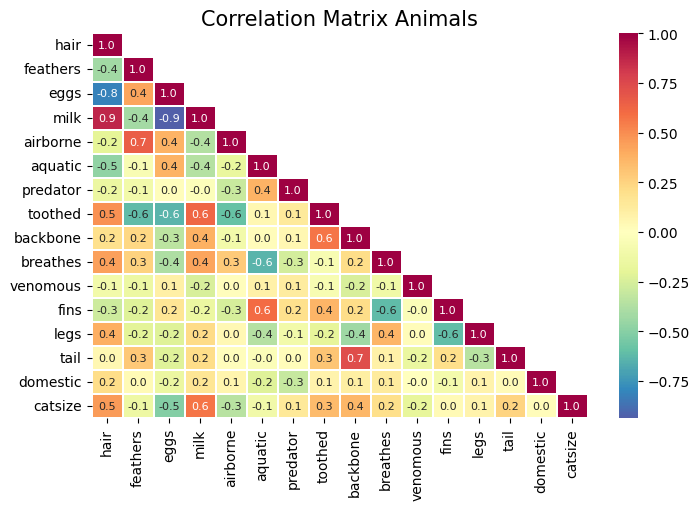

In [7]:
#delete also column class_type 
df_zoo_nc = df_zoo.drop(['class_type'],axis=1) #Temporarily removed for a better confusion matrix's version

#Data correlation control
ut.correlation_matrix(df_zoo_nc)

#### Osservazioni:
Dalla correlation matrix emerge che ci sono 8 coppie di feautures strettamente correlate (valori da -0,9 a 0,9).
Valori negativi e cosa indicano:
- eggs-hair (-0,8) 
    -> un animale che produce uova molto difficilmente ha la pelliccia
- toothed-eggs (-0,7)
    -> un animale che produce uova difficilmente ha i denti
- breathers-aquatic (-0,7)
    -> un animale che respira difficilmente è acquatico
- milk-eggs (-1,0)
    -> un animale che produce uova NON produce anche il latte

Valori positivi:
- airborne-feathers (0,7)
    -> un animale che ha la capacità di volare è probabile che abbia le piume
- toothed-milk (0,7)
    -> un animale con i denti è probabile che produca latte
- tail-backbone (0,7)
    -> un animale con la coda è probabile che sia un vertebrato
- milk-hair (0,9)
     -> un animale che produce latte MOLTO probailmente ha la pelliccia

In [8]:
df_zoo.head(3)

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   

   class_type  
0           1  
1           1  
2           4

#### Osservazioni:
Di norma i dataset sono di grandi dimensione e non è possibile verificare l'esattezza/coerenza dei dati (ne compito del'analista farlo). In questo caso progetto però la numerosità dei dati lo consente e lo facciamo al fine di prendere dimestichezza con la manipolazione del dataset.


Dati errati da correggere con valore corretto da aggiornare:

--> campo = **eggs (uova)**
- seasnake (serpente di mare) depone uova (1)

</br> --> campo = **aquatic (acquatico)**
- clam (mollusco) è acquatico (1)

</br> --> campo = **predator (predatore)**
- boar (cinghiale) NON è un predatore (0)
- clam (mollusco) NON è un predatore (0)

</br> --> campo = **toothed (dentato)**
- carp (carpa) NON ha i denti (0)
- frog (rana) NON hanno denti (0)
- seahorse (cavalluccio marino) NON ha denti (0)

</br> --> campo = **fins (pinne)**
- sealion (leone marino) ha solo pinne (1)

</br> --> campo = **legs (zampe)**
- crab (granchio) ha 10 zampe e NON 4
- crayfish (gambero) ha 10 zampe e NON 6
- gorilla (gorilla) ha 4 zampe
- lobster (aragosta) ha 10 zampe e NON 6
- sealion (leone marino) NON ha zampe (0)
- wallaby (canguro) ha 4 zampe
- starfish (stella marina) NON ha zampe (0)
- octopus (polpo) NON ha zampe (0)

</br> --> campo = **tail (coda)**
- aardvark (oritteropo) ha la coda (1)
- bear (orso) ha la coda (1)
- fruitbat (volpe volante) è un pipistrello quindi NON ha la coda (0)
- kiwi (uccello kiwi) NON ha la coda (0)
- lobster (aragosta) ha la coda (1)

</br> --> **valori duplicati** 
- ci sono 2 frog (rana), una velenosa, l'altra no - rinominarne una!

#### Azioni:
Procediamo alla modifica dei valori errati colonna per colonna

In [9]:
#Dictionary with the changes to be made
modifications = {
    'eggs': {'seasnake': 1},
    'aquatic': {'clam': 1},
    'predator': {'boar': 0, 'clam': 0},
    'toothed': {'carp': 0, 'frog': 0, 'seahorse': 0},
    'fins': {'sealion': 1},
    'legs': {'crab': 10, 'crayfish': 10, 'gorilla': 4, 'sealion': 0,'wallaby': 4, 'starfish': 0, 'octopus': 0},
    'tail': {'aardvark': 1, 'bear': 1, 'fruitbat': 0, 'kiwi': 0, 'lobster': 1}
}
#Change errors in dataframe
for col, mod_dict in modifications.items():
    ut.modify_column(df_zoo, 'animal_name', col, mod_dict)

Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate


#### Azioni:
Cerchiamo i nomi degli animali duplicati; ci dovrebbe essere solo la rana. (non si tratta di un record duplicato: una rana è velenosa, l'altra no).

In [10]:
#Extract animal_name colum
col_animal_name = 'animal_name'
animal_names = df_zoo[col_animal_name]

#Search duplicate name and print
duplicated_animals = df_zoo[animal_names.duplicated(keep=False)]
print(duplicated_animals[col_animal_name].unique())

['frog']


#### Azioni:
Cerchiamo la posizione di rana e rinominiamo una delle due.

In [11]:
#Search position of rana
idx_rana = df_zoo.index[df_zoo['animal_name'] == 'frog']
print(idx_rana)

Int64Index([25, 26], dtype='int64')


In [12]:
#Change second rana in rana vel and check
df_zoo.loc[26, 'animal_name'] = 'frog2'
df_zoo.iloc[25:27]

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
25        frog     0         0     1     0         0        1         1   
26       frog2     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
25        0         1         1         0     0     4     0         0   
26        0         1         1         1     0     4     0         0   

    catsize  class_type  
25        0           5  
26        0           5

#### Azioni:
Rinominiamo ed esportiamo in csv il dataset pulito che utilizzeremo successivamente.

In [55]:
#Export to csv 
df_zoo_cln = df_zoo
df_zoo_cln.to_csv('zoo_cln_NoTrans.csv', index=False)
df_new = pd.read_csv('zoo_cln.csv')
df_new.head(3)

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     1         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   

   class_type  
0           1  
1           1  
2           4

In [56]:
df_new #df complete
df_nc = df_new.drop(['class_type'],axis=1) #df without class_type column

#### Azioni:
Prima di procedere con l'applicazione degli algoritmi indaghiamo su possibili raggruppamenti in base alla caratteristica legs, l'unica con valori diversi da 0 e 1.

In [57]:
#Group by legs
gruppi = df_new.groupby(['legs'])

for num, (nome, gruppo) in enumerate(gruppi):
    print('Gruppo', num+1)
    for index, row in gruppo.iterrows(): 
        #scorro righe di Gruppo restituendo indice di riga e i suoi valori, creando 2 variabili
        #indice è la posizione della riga e row i suoi valori
        if row['legs'] > 0:
            print('',row["animal_name"],"zampe (",row["legs"],")") #"row['nome_colonna']" struttura x accedere ai valori
        else:
            print('',row["animal_name"],"pinne (",row["fins"],")")
    print('Totale:', len(gruppo),'\n') 

Gruppo 1
 bass pinne ( 1 )
 carp pinne ( 1 )
 catfish pinne ( 1 )
 chub pinne ( 1 )
 clam pinne ( 0 )
 dogfish pinne ( 1 )
 dolphin pinne ( 1 )
 haddock pinne ( 1 )
 herring pinne ( 1 )
 octopus pinne ( 0 )
 pike pinne ( 1 )
 piranha pinne ( 1 )
 pitviper pinne ( 0 )
 porpoise pinne ( 1 )
 seahorse pinne ( 1 )
 seal pinne ( 1 )
 sealion pinne ( 1 )
 seasnake pinne ( 0 )
 seawasp pinne ( 0 )
 slowworm pinne ( 0 )
 slug pinne ( 0 )
 sole pinne ( 1 )
 starfish pinne ( 0 )
 stingray pinne ( 1 )
 tuna pinne ( 1 )
 worm pinne ( 0 )
Totale: 26 

Gruppo 2
 chicken zampe ( 2 )
 crow zampe ( 2 )
 dove zampe ( 2 )
 duck zampe ( 2 )
 flamingo zampe ( 2 )
 fruitbat zampe ( 2 )
 girl zampe ( 2 )
 gull zampe ( 2 )
 hawk zampe ( 2 )
 kiwi zampe ( 2 )
 lark zampe ( 2 )
 ostrich zampe ( 2 )
 parakeet zampe ( 2 )
 penguin zampe ( 2 )
 pheasant zampe ( 2 )
 rhea zampe ( 2 )
 skimmer zampe ( 2 )
 skua zampe ( 2 )
 sparrow zampe ( 2 )
 squirrel zampe ( 2 )
 swan zampe ( 2 )
 vampire zampe ( 2 )
 vulture zam

#### Osservazioni:
Utilizzando il group by sulle caratteristiche zampe abbiamo un primo riscontro interessante ovvero si ottiene un numero di gruppi molto simile (6 vs 7) alle 'etichette' nel file class.csv.

<div class="alert alert-info" style="background-color:LightGree; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 2. Applicazione degli algoritmi di clustering </h2>
</div>

#### Azioni:
Applicheremo, in sequenza, i tre principali algoritmi dell'apprendimento non supervisionato:

1 - **K-Means**

2 - **Clustering gerarchico**

3 - **DBScan**

In [58]:
#Used version df without column class_type
df_nc.shape

(101, 17)

In [59]:
df_nc.head(1)

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0        1         1         1         0     0     4     1         0        1

In [60]:
#Select data for T-Sne
X = df_nc.iloc[:, 1:17].values  #select all
y = df_nc.iloc[:, -4].values  #select legs column
n_samples, n_features = X.shape
n_samples, n_features

(101, 16)

<div class="alert alert-info" style= "background-color:white; color:green; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> La riduzione della complessita con T-Sne </h2>
</div>

Esegue la riduzione della dimensionalità utilizzando t-Distributed Stochastic Neighbor Embedding (t-SNE).

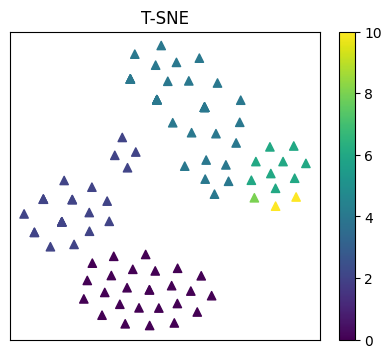

In [98]:
#With T-SNE we reduces complexity by taking space from 14 dimensions to 2 for graphical representation
data_reduced =ut.t_sne(X, n_components=2, n_iter=500, n_iter_without_progress=150, n_jobs=2, random_state=0)

#Scatter plot of T-SNE
ut.scatter_plot(data_reduced, c=y, title='T-SNE', cmap='viridis', marker='^')
plt.savefig('3.Graphics/T-SNE_NoTrans.png')
plt.show()

#### Osservazioni:
I valori della variabile X sono stati sostituiti con le *nuove coordinate bidimensionali*, calcolate dall'algoritmo t-SNE, per rappresentare i dati in uno spazio a due dimensioni.

<div class="alert alert-info" style= "background-color:white; color:red; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> L'algoritmo K-Means </h2>
</div>

Assegna i punti in base alla distanza dal centroide.

### K-Means con init 'random'

#### Osservazioni:
In generale l'impostazione di K-Means con init random parte da un inizializzazione causale dei centroidi per calcolare i clusters del dataset. In questo caso scegliamo di fissare il parametro random_state, e quindi il seed, in modo da ottenere lanci deterministici dei centroidi, per confrontabilità dei risultati.

In [62]:
#Take data's T-Sne
X = data_reduced

#K-Means - init 'random' (selected 7 clusters to compare with class.csv)
kmeans, y_km_clustering= ut.km_clust(X, n_clusters=7, init='random', 
                                           n_init=10, max_iter=300, tol=1e-4,random_state=1234)

Etichette univoche dei cluster: [1 2 3 4 5 6 7]


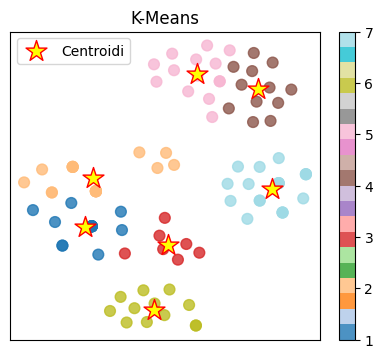

In [63]:
#Plot of K-Means
ut.plot_kmeans(X,y_km_clustering, kmeans.cluster_centers_, 'K-Means')
plt.savefig('3.Graphics/KMeans plot_NoTrans.png')

In [64]:
#Extract the algorithm's results
df_cl=ut.results_group(X, df_nc, y_km_clustering, 'K-Means')

Algoritmo K-Means 

Pred Labels 1
aardvark
bear
cheetah
gorilla
leopard
lion
lynx
mink
mole
mongoose
opossum
polecat
puma
pussycat
raccoon
wallaby
wolf
Totale: 17 

Pred Labels 2
antelope
boar
buffalo
calf
cavy
deer
elephant
fruitbat
giraffe
girl
goat
hamster
hare
oryx
pony
reindeer
squirrel
vampire
vole
Totale: 19 

Pred Labels 3
frog
frog2
newt
platypus
toad
tortoise
tuatara
Totale: 7 

Pred Labels 4
carp
chub
clam
haddock
octopus
seahorse
seawasp
slowworm
slug
sole
starfish
worm
Totale: 12 

Pred Labels 5
bass
catfish
dogfish
dolphin
herring
pike
piranha
pitviper
porpoise
seal
sealion
seasnake
stingray
tuna
Totale: 14 

Pred Labels 6
crab
crayfish
flea
gnat
honeybee
housefly
ladybird
lobster
moth
scorpion
termite
wasp
Totale: 12 

Pred Labels 7
chicken
crow
dove
duck
flamingo
gull
hawk
kiwi
lark
ostrich
parakeet
penguin
pheasant
rhea
skimmer
skua
sparrow
swan
vulture
wren
Totale: 20 



In [65]:
#Save df_cl in new df_res_km_random
df_kmeans= df_cl.copy()
df_kmeans.head()

Animal Pred Labels
0  aardvark           1
1  antelope           2
2      bass           5
3      bear           1
4      boar           2

In [66]:
#Merge results(predict labels) with real labels and create file.csv
merged_df_km = ut.merge(df_zoo, df_kmeans, namecsv='1.dfmerge_kmeans_NoTrans')

Esportato file 1.dfmerge_kmeans_NoTrans.csv nella cartella 4.Merge del progetto


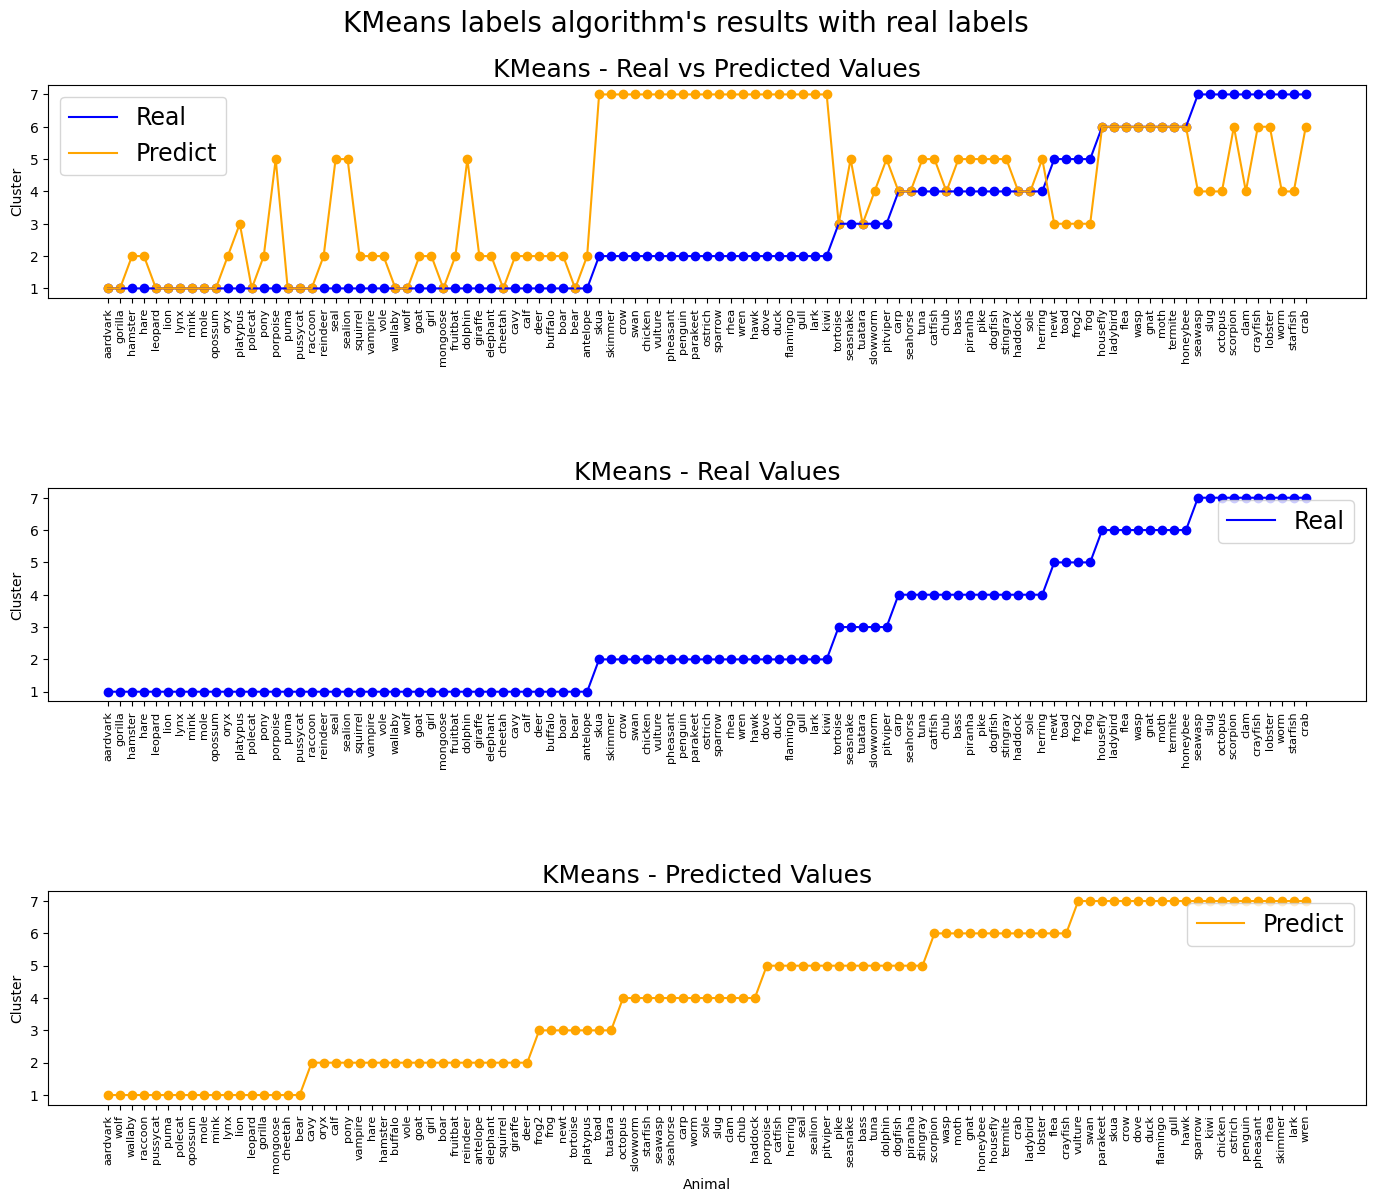

In [67]:
#Comparing labes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(17, 15))
ut.plot_res_ord(merged_df_km, 'KMeans - Real vs Predicted Values', ax=ax1)
ax1.set_xlabel('') #Animals
ut.plot_res_real(merged_df_km, 'KMeans - Real Values', ax=ax2)
ax2.set_xlabel('') #Animals
ut.plot_res_pred(merged_df_km, 'KMeans - Predicted Values', ax=ax3)
fig.suptitle("KMeans labels algorithm's results with real labels", fontsize=20, y=0.93)
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(hspace = 0.89)
plt.savefig('3.Graphics/KMeans_Etichette reali vs predette_NoTrans.png')
plt.show()

#### Osservazioni:
Il grafico mostra a colpo d'occhio la riallocazione dei campioni rispetto alla classificazione attesa: il lcluster numero 5 delle etichette reali e il numero 3 contengono gli stessi campioni.

Pair confusion Matrix of
KMeans
[[7460  286]
 [1158 1196]]



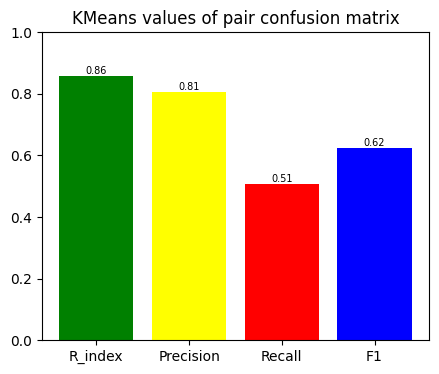

In [69]:
#Show Matrix
rand_index, precision, recall, f1 = ut.pair_conf_matrix(merged_df_km, 'KMeans')
ut.values_pair_conf_matrix(rand_index, precision, recall, f1, 'KMeans values of pair confusion matrix')

### Elbow Method

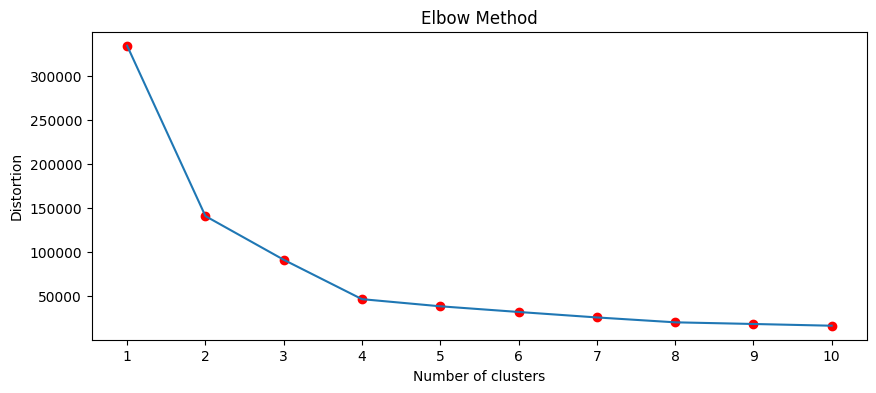

Inertia: 26104.84


In [70]:
#Elbow Method
kmeans.inertia_

inertias = []
for i in np.arange(1,11):
    km = KMeans(n_clusters= i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

#Plotting inertias values
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1,11),inertias)
plt.scatter(np.arange(1,11),inertias, color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(1,11))
plt.show()

print('Inertia: %.2f' % kmeans.inertia_)

#### Osservazioni:
Il metodo suggerisce sommariamento il numero ottimale di clusters, in questo caso pari a 4.

### Silhouette score

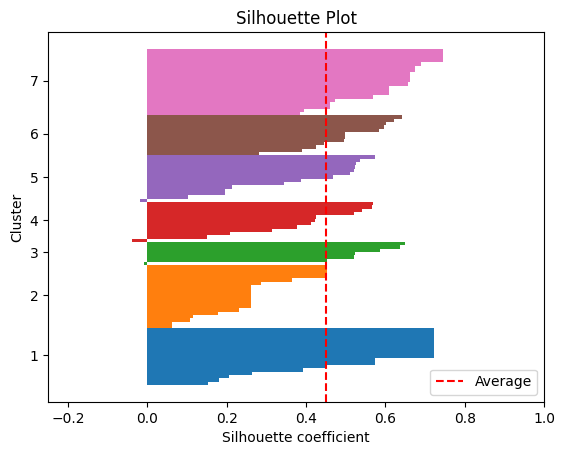

Media:0.451


In [71]:
#Silhouette Plot
ut.plot_silhouette(X, kmeans, title='Silhouette Plot')

#### Osservazioni:
Il profilo di siluette non è dei migliori, ci sono ampie fluttuazioni nelle dimensioni dei diversi raggruppamenti, che hanno inoltre spessore differente e profili disomogenei; talvolta ci sono anche valori negativi.

Per vedere come cambia il Silouette score, impostiamo a 4 il numero di cluster invece di 7.

In [72]:
#K-Means - init 'k-means++' (selected 4 clusters to compare with 7 clusters)
kmeans, y_kmplus_clustering = ut.km_clust(X, n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=0)

Etichette univoche dei cluster: [1 2 3 4]


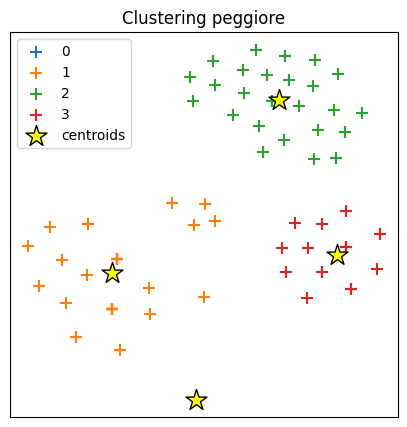

In [73]:
#Bad clustering
fig = plt.figure(figsize=(5, 5))
for i, c in enumerate(np.unique(kmeans.labels_)):
    plt.scatter(X[y_kmplus_clustering == c, 0],
            X[y_kmplus_clustering == c, 1],
            s=67,
            color=plt.cm.tab10(c),
            marker='+',
            label=str(c))

plt.title('Clustering peggiore')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, marker='*', color='yellow', edgecolor='black', label='centroids')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

#### Osservazioni:
Dal grafico, ancor prima di procedere con il plot del Silhouette score, è già evidente che esistono punti assegnati in maniera errata, oltre che un centroide isolato.

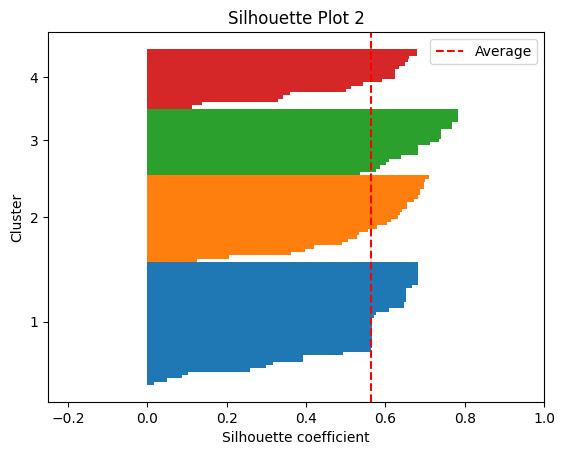

Media:0.565


In [74]:
#Silhouette Plot
ut.plot_silhouette(X, kmeans, title='Silhouette Plot 2')

#### Osservazioni:

Il grafico conferma che 4 è un numero di cluster inadatto, seppur suggerito dall'elbrow metod. Si notano distintamente le dimensioni eterogenee nei raggruppamenti e profili di silhouette altamente frastagliati.

<div class="alert alert-info" style= "background-color:white; color:blue; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> Il Clustering gerarchico - Agglomerative Clustering</h2>
</div>

Aggrega per vicinanza di punti, senza l'uso di centroidi, in modo gerarchico, fino ad arrivare al numero di cluster impostato.

In [75]:
#Take data's T-Sne
X = data_reduced

#AgglomerativeClustering (selected 7 clusters to compare with class.csv)
y_ac_blob_s = ut.agglomerative_clust(X, n_clusters=7, affinity='euclidean', linkage='single')
y_ac_blob_c = ut.agglomerative_clust(X, n_clusters=7, affinity='euclidean', linkage='complete')
y_ac_blob_a = ut.agglomerative_clust(X, n_clusters=7, affinity='cosine', linkage='average')

Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]


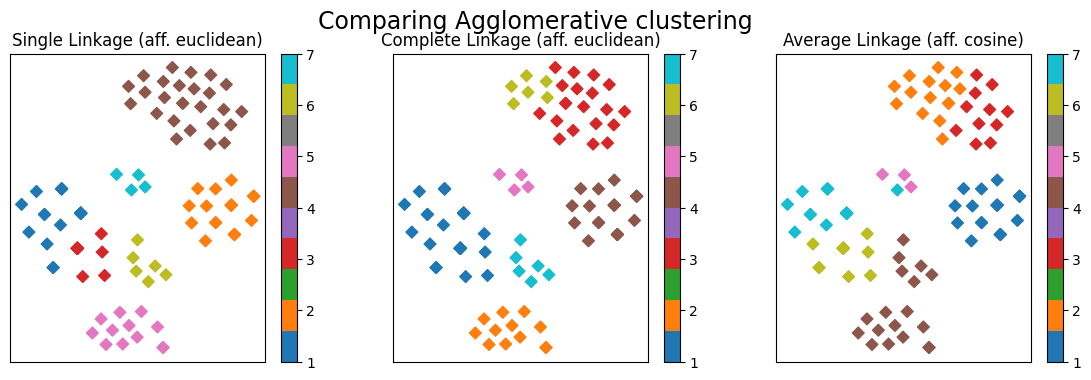

In [76]:
#Comparing different way to group data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
ut.scatter_plot(X, c=y_ac_blob_s[1], title='Single Linkage (aff. euclidean)', cmap='tab10', marker='D', ax=ax1)
ut.scatter_plot(X, c=y_ac_blob_c[1], title='Complete Linkage (aff. euclidean)', cmap='tab10', marker='D', ax=ax2)
ut.scatter_plot(X, c=y_ac_blob_a[1], title='Average Linkage (aff. cosine)', cmap='tab10', marker='D', ax=ax3)
fig.suptitle("Comparing Agglomerative clustering", fontsize=17, y=0.99)
plt.savefig('3.Graphics/Comparazione Agglomerative clustering euclid-cosine_NoTrans.png')
plt.show()

#### Osservazioni:
Il grafico sembrerebbe evidenziare un miglior raggruppamento nel Complete Linkage con distanza euclidea, verifichiamo se è davvero così con valutazioni numeriche.

In [77]:
#Extract the algorithm's results of three Agglomerative clustering
df_cl_s = ut.results_group(X, df_nc, y_ac_blob_s[1], 'Agglom Clustering Single Linkage - euclidean')
print('--------------------------------------------------------\n')
df_cl_c = ut.results_group(X, df_nc, y_ac_blob_c[1], 'Agglom Clustering Complete Linkage - euclidean')
print('--------------------------------------------------------\n')
df_cl_a = ut.results_group(X, df_nc, y_ac_blob_a[1], 'Agglom Clustering Average Linkage - Cosine')

Algoritmo Agglom Clustering Single Linkage - euclidean 

Pred Labels 1
antelope
boar
buffalo
calf
cavy
deer
elephant
giraffe
goat
gorilla
hamster
hare
mole
opossum
oryx
pony
pussycat
reindeer
vole
wallaby
Totale: 20 

Pred Labels 2
chicken
crow
dove
duck
flamingo
gull
hawk
kiwi
lark
ostrich
parakeet
penguin
pheasant
rhea
skimmer
skua
sparrow
swan
vulture
wren
Totale: 20 

Pred Labels 3
aardvark
bear
cheetah
leopard
lion
lynx
mink
mongoose
platypus
polecat
puma
raccoon
wolf
Totale: 13 

Pred Labels 4
bass
carp
catfish
chub
clam
dogfish
dolphin
haddock
herring
octopus
pike
piranha
pitviper
porpoise
seahorse
seal
sealion
seasnake
seawasp
slowworm
slug
sole
starfish
stingray
tuna
worm
Totale: 26 

Pred Labels 5
crab
crayfish
flea
gnat
honeybee
housefly
ladybird
lobster
moth
scorpion
termite
wasp
Totale: 12 

Pred Labels 6
frog
frog2
newt
toad
tortoise
tuatara
Totale: 6 

Pred Labels 7
fruitbat
girl
squirrel
vampire
Totale: 4 

--------------------------------------------------------

Algor

In [78]:
#Save df_cl in new df
df_ag_sin_lkeu = df_cl_s.copy()
df_ag_com_lkeu = df_cl_c.copy()
df_ag_av_lkcs = df_cl_a.copy()

In [79]:
#Merge results(predict labels) with real labels and create file.csv
merged_df_ag_sin_lkeu = ut.merge(df_zoo, df_ag_sin_lkeu, namecsv='2.dfmerge_ag_sin_lkeu_NoTrans')
merged_df_ag_com_lkeu = ut.merge(df_zoo, df_ag_com_lkeu, namecsv='2.dfmerge_ag_com_lkeu_NoTrans')
merged_df_ag_av_lkcs = ut.merge(df_zoo, df_ag_av_lkcs, namecsv='2.dfmerge_ag_av_lkcs_NoTrans')

Esportato file 2.dfmerge_ag_sin_lkeu_NoTrans.csv nella cartella 4.Merge del progetto
Esportato file 2.dfmerge_ag_com_lkeu_NoTrans.csv nella cartella 4.Merge del progetto
Esportato file 2.dfmerge_ag_av_lkcs_NoTrans.csv nella cartella 4.Merge del progetto


In [80]:
#Comparing Pair confusion Matrix
rand_index_s, precision_s, recall_s, f1_s = ut.pair_conf_matrix(merged_df_ag_sin_lkeu, 'Agglomerative Single Linkage euclidean')
rand_index_c, precision_c, recall_c, f1_c = ut.pair_conf_matrix(merged_df_ag_com_lkeu, 'Agglomerative Complete Linkage euclidean')
rand_index_a, precision_a, recall_a, f1_a = ut.pair_conf_matrix(merged_df_ag_av_lkcs, 'Agglomerative Clustering Average Linkage Cosine')

Pair confusion Matrix of
Agglomerative Single Linkage euclidean
[[7220  526]
 [1140 1214]]

Pair confusion Matrix of
Agglomerative Complete Linkage euclidean
[[7416  330]
 [ 664 1690]]

Pair confusion Matrix of
Agglomerative Clustering Average Linkage Cosine
[[7330  416]
 [1212 1142]]



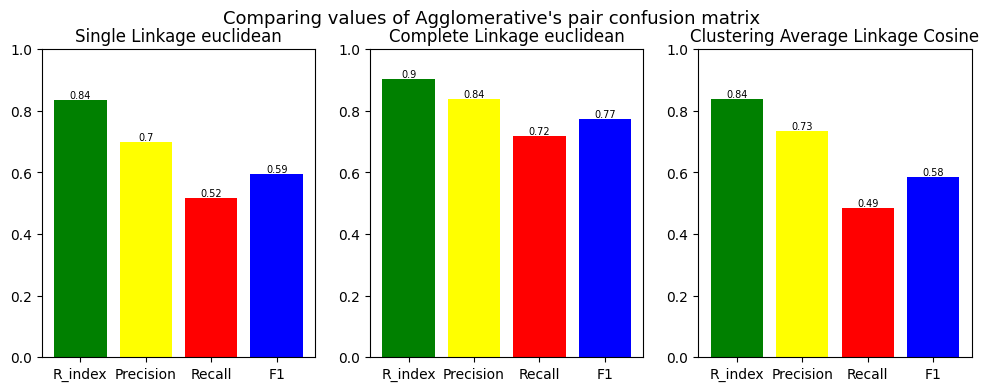

In [81]:
#Plot bar charts
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ut.values_pair_conf_matrix(rand_index_s, precision_s, recall_s, f1_s, 'Single Linkage euclidean', ax=ax1)
ut.values_pair_conf_matrix(rand_index_c, precision_c, recall_c, f1_c, 'Complete Linkage euclidean',ax=ax2)
ut.values_pair_conf_matrix(rand_index_a, precision_a, recall_a, f1_a, 'Clustering Average Linkage Cosine',ax=ax3)
fig.suptitle("Comparing values of Agglomerative's pair confusion matrix", fontsize=13)
plt.savefig('3.Graphics/Agglomerative Cl_Comparazione pair confusion matrix_NoTrans.png')
plt.show()

#### Osservazioni:
I dati confermano la bontà della nostra precedente scelta.

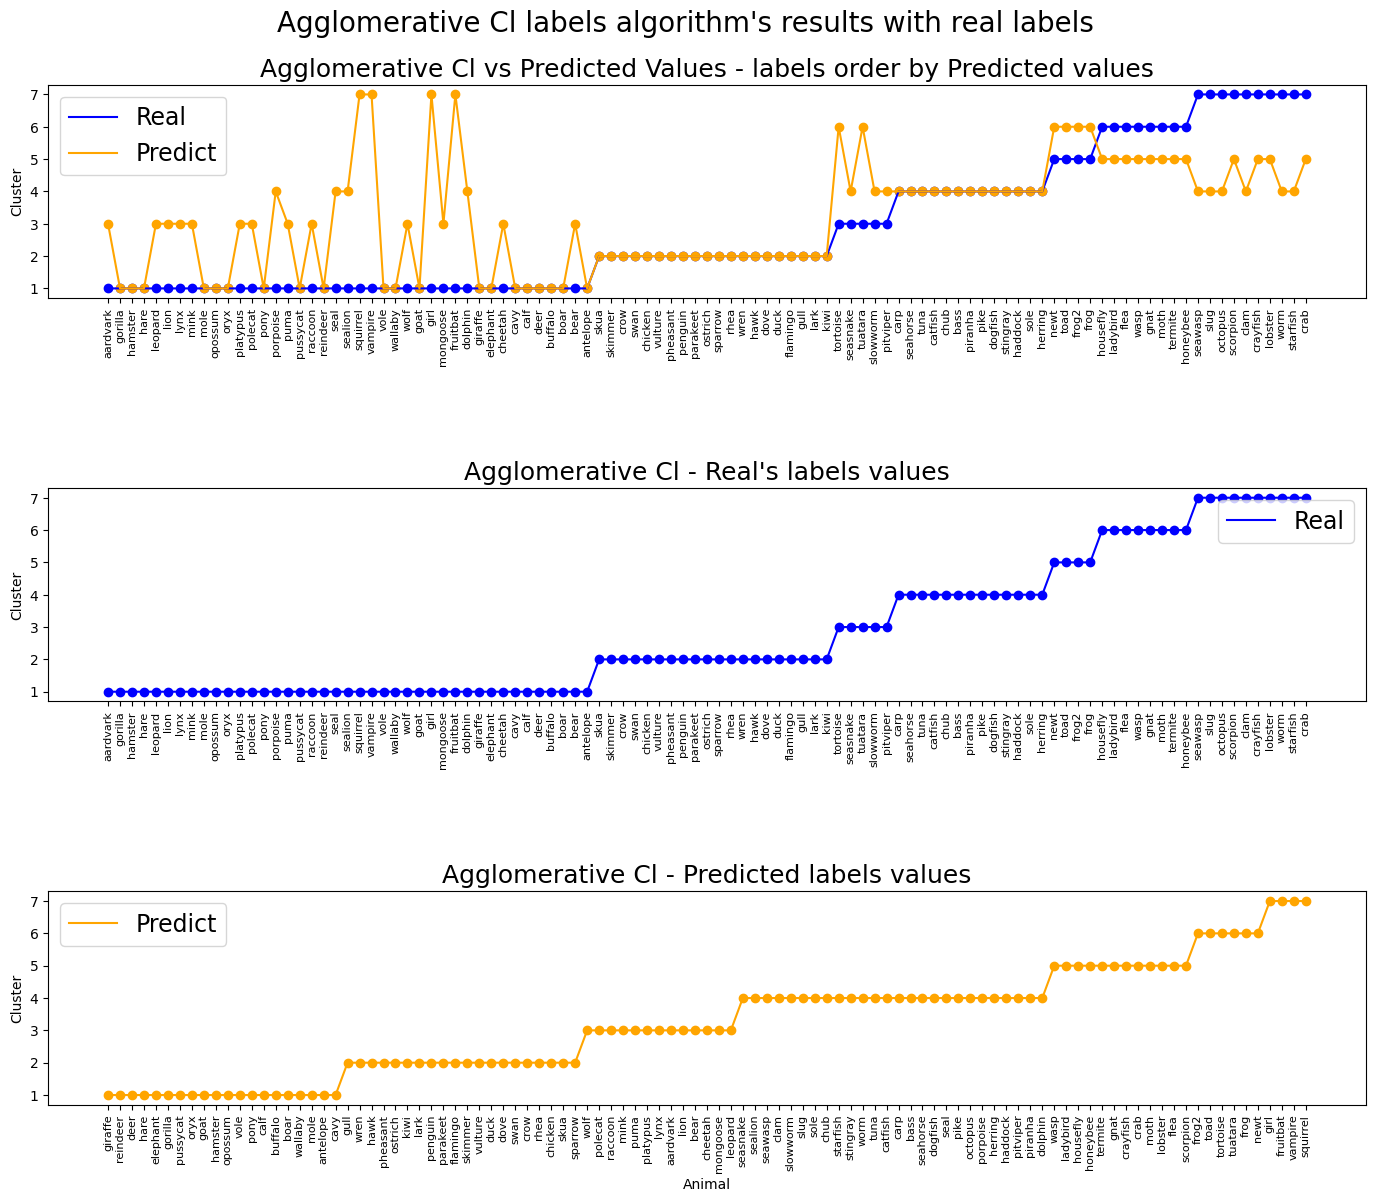

In [82]:
#Comparing labels
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(17, 15))
ut.plot_res_ord(merged_df_ag_sin_lkeu, 'Agglomerative Cl vs Predicted Values - labels order by Predicted values', ax=ax1)
ax1.set_xlabel('') #Animals
ut.plot_res_real(merged_df_ag_sin_lkeu, 'Agglomerative Cl - Real\'s labels values', ax=ax2)
ax2.set_xlabel('') #Animals
ut.plot_res_pred(merged_df_ag_sin_lkeu, 'Agglomerative Cl - Predicted labels values', ax=ax3)
fig.suptitle("Agglomerative Cl labels algorithm's results with real labels", fontsize=20, y=0.93)
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(hspace = 0.89)
plt.savefig('3.Graphics/Agglomerative Cl_Etichette reali vs predette_NoTrans.png')
plt.show()

#### Osservazioni:
Il grafico la riallocazione dei campioni rispetto alla classificazione attesa: d'immediata visione la perfetta sovrapposizione tra etichette reali e predette del cluster numero 2.

<div class="alert alert-info" style= "background-color:white; color:orange; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> Il DBScan </h2>
</div>

Utilizza la stima della densità, identifica regioni di punti + dense.

In [83]:
#Take data's T-Sne
X = data_reduced

#Dbscan clustering 
labels_e = ut.dbscan_clust(X, eps= 1.1, min_samples= 3, metric='euclidean')
labels_m = ut.dbscan_clust(X, eps= 1.5, min_samples= 3, metric='mahalanobis')

Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]


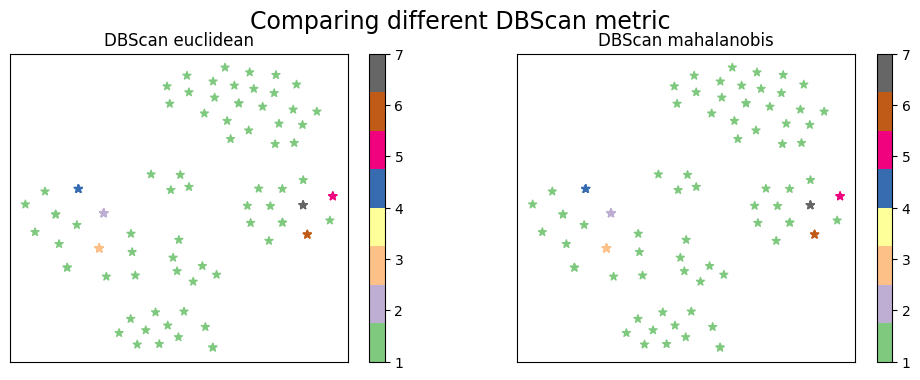

In [84]:
#Comparing different metrics
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ut.scatter_plot(X, c=labels_e[1], title='DBScan euclidean', cmap='Accent', marker='*', ax=ax1)
ut.scatter_plot(X, c=labels_m[1], title='DBScan mahalanobis', cmap='Accent', marker='*', ax=ax2)
fig.suptitle("Comparing different DBScan metric", fontsize=17, y=0.99)
plt.savefig('3.Graphics/Comparazione metriche DBScan_NoTrans.png')
plt.show()

#### Osservazioni:
Il grafico mostra nettamente il diverso comportamento dell'algoritmo DBScan, che non sembra fare nessun raggruppamento, rispetto agli algoritmi usati precedentemente.

In [85]:
#Extract the algorithm's results
df_cl_e = ut.results_group(X, df_nc, labels_e[1] , 'DB Scan Euclidean')
print('--------------------------------------------------------\n')
df_cl_m = ut.results_group(X, df_nc, labels_m[1] , 'DB Scan Mahalanobis')

Algoritmo DB Scan Euclidean 

Pred Labels 1
aardvark
bass
carp
catfish
cavy
chub
clam
crab
crayfish
crow
dogfish
dolphin
duck
flamingo
flea
frog
frog2
fruitbat
girl
gnat
gorilla
haddock
hamster
hare
hawk
herring
honeybee
housefly
kiwi
ladybird
lobster
mink
mole
moth
newt
octopus
opossum
ostrich
penguin
pike
piranha
pitviper
platypus
porpoise
pussycat
rhea
scorpion
seahorse
seal
sealion
seasnake
seawasp
slowworm
slug
sole
squirrel
starfish
stingray
swan
termite
toad
tortoise
tuatara
tuna
vampire
vole
vulture
wallaby
wasp
wolf
worm
Totale: 71 

Pred Labels 2
antelope
boar
buffalo
deer
elephant
giraffe
oryx
Totale: 7 

Pred Labels 3
bear
cheetah
leopard
lion
lynx
mongoose
polecat
puma
raccoon
Totale: 9 

Pred Labels 4
calf
goat
pony
reindeer
Totale: 4 

Pred Labels 5
chicken
dove
parakeet
Totale: 3 

Pred Labels 6
gull
skimmer
skua
Totale: 3 

Pred Labels 7
lark
pheasant
sparrow
wren
Totale: 4 

--------------------------------------------------------

Algoritmo DB Scan Mahalanobis 

Pred

In [86]:
#Save df_cl in new df
df_DBs_euclidean = df_cl_e.copy()
df_DBs_mahalanobis = df_cl_m.copy()

In [87]:
#Merge results(predict labels) with real labels and create file.csv
merged_df_DBs_euc = ut.merge(df_zoo, df_DBs_euclidean, namecsv='3.dfmerge_DBs_euc_NoTrans')
merged_df_DBs_mah = ut.merge(df_zoo, df_DBs_mahalanobis, namecsv='3.dfmerge_DBs_mah_NoTrans')

Esportato file 3.dfmerge_DBs_euc_NoTrans.csv nella cartella 4.Merge del progetto
Esportato file 3.dfmerge_DBs_mah_NoTrans.csv nella cartella 4.Merge del progetto


In [88]:
#Comparing Pair confusion Matrix
rand_index_e, precision_e, recall_e, f1_e = ut.pair_conf_matrix(merged_df_DBs_euc, 'DBScan Euclidean')
rand_index_m, precision_m, recall_m, f1_m = ut.pair_conf_matrix(merged_df_DBs_mah, 'DBScan Mahalanobis')

Pair confusion Matrix of
DBScan Euclidean
[[3620 4126]
 [1360  994]]

Pair confusion Matrix of
DBScan Mahalanobis
[[3620 4126]
 [1360  994]]



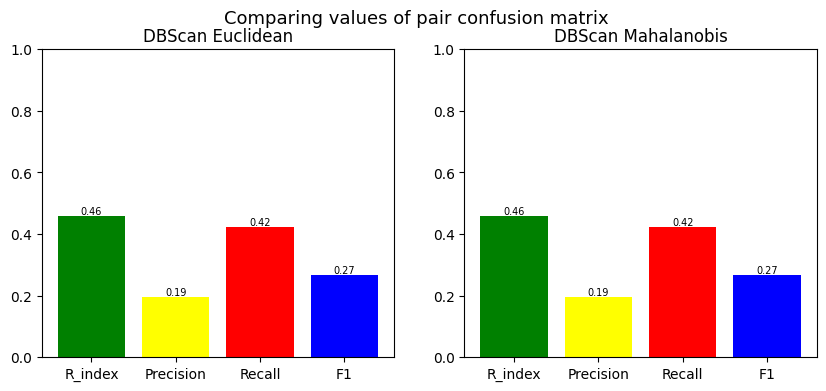

In [89]:
#Plot bar charts
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ut.values_pair_conf_matrix(rand_index_e, precision_e, recall_e, f1_e, 'DBScan Euclidean', ax=ax1)
ut.values_pair_conf_matrix(rand_index_m, precision_m, recall_m, f1_m, 'DBScan Mahalanobis',ax=ax2)
fig.suptitle("Comparing values of pair confusion matrix", fontsize=13)
plt.savefig('3.Graphics/DBScan_comparazione pair confusion matrix_NoTrans.png')
plt.show()

#### Osservazioni:
I dati confermano che tra mostrano che non vi è alcuna differenza tra le due metriche applicate.

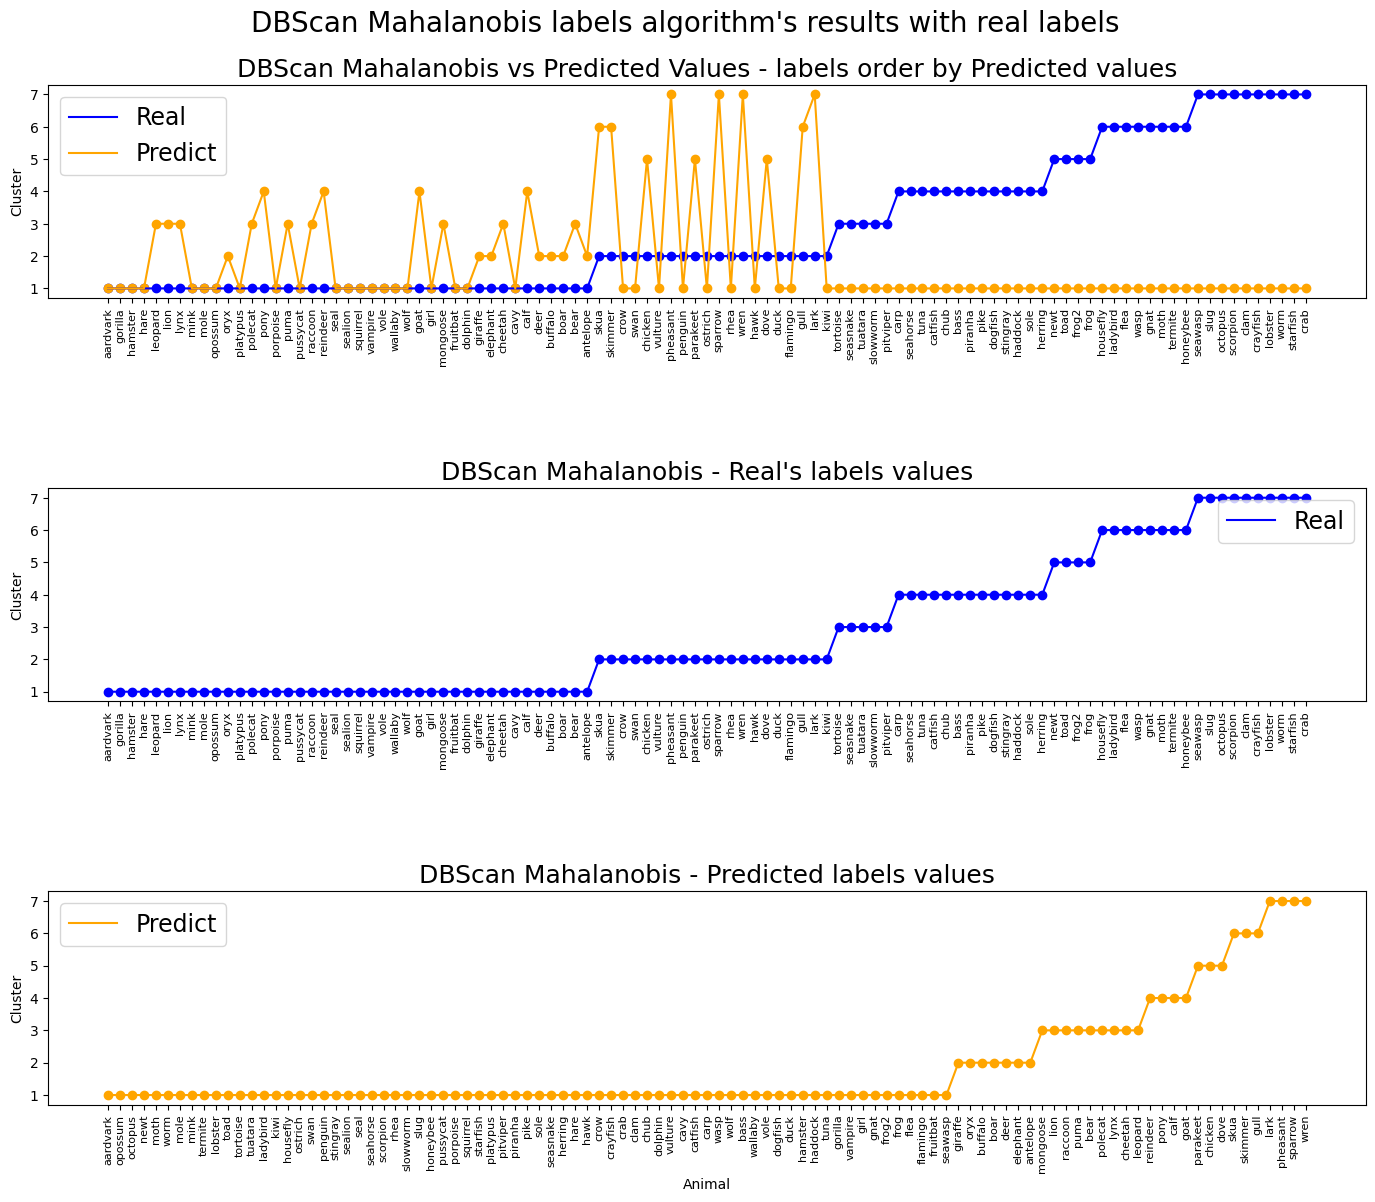

In [90]:
#Comparing labels
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(17, 15))
ut.plot_res_ord(merged_df_DBs_mah, 'DBScan Mahalanobis vs Predicted Values - labels order by Predicted values', ax=ax1)
ax1.set_xlabel('') #Animals
ut.plot_res_real(merged_df_DBs_mah, 'DBScan Mahalanobis - Real\'s labels values', ax=ax2)
ax2.set_xlabel('') #Animals
ut.plot_res_pred(merged_df_DBs_mah, 'DBScan Mahalanobis - Predicted labels values', ax=ax3)
fig.suptitle("DBScan Mahalanobis labels algorithm's results with real labels", fontsize=20, y=0.93)
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(hspace = 0.89)
plt.savefig('3.Graphics/DBScan Mahalanobis_Etichette reali vs predette_NoTrans.png')
plt.show()

#### Osservazioni:
Il grafico mostra a colpo d'occhio la riallocazione dei campioni rispetto alla classificazione attesa: si osserva che ben 5 cluster delle etichette reali sono stati accorpati nel cluster numero 1 delle etichette predette.

<div class="alert alert-info" style="background-color:LightGreen; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 3. Risultati a confronto </h2>
</div>

In [91]:
X = data_reduced

In [92]:
kmeans, y_km_clustering= ut.km_clust(X, n_clusters=7, init='random', 
                                           n_init=10, max_iter=300, tol=1e-4,random_state=1234)
y_ac_blob_c = ut.agglomerative_clust(X, n_clusters=7, affinity='euclidean', linkage='complete')
labels_m = ut.dbscan_clust(X, eps= 1.1, min_samples= 3, metric='mahalanobis')

Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]


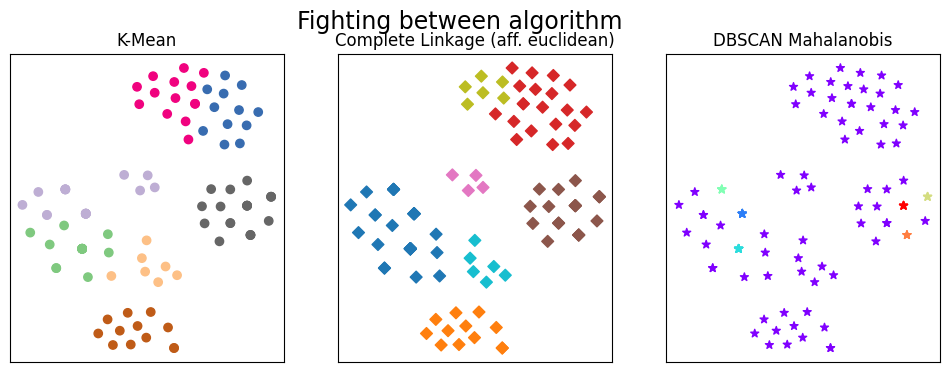

In [93]:
#Comparing different way to group data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ut.scatter_plot(X, c=y_km_clustering, title='K-Mean', cmap='Accent', marker='o', colorbar=False, ax=ax1)
ut.scatter_plot(X, c=y_ac_blob_c[1], title='Complete Linkage (aff. euclidean)', cmap='tab10', marker='D', colorbar=False, ax=ax2)
ut.scatter_plot(X, c=labels_m[1], title='DBSCAN Mahalanobis', cmap='rainbow', marker='*', colorbar=False, ax=ax3)
fig.suptitle("Fighting between algorithm", fontsize=17, y=0.99)
plt.savefig('3.Graphics/Tre algoritmi a confronto_NoTrans.png')
plt.show()

#edgecolor='red',

#### Osservazioni:
Dei tre algoritrmi DBScan è quello che più si discosta dall'obbiettivo del progetto dal momento che non riesce a creare raggruppamenti.

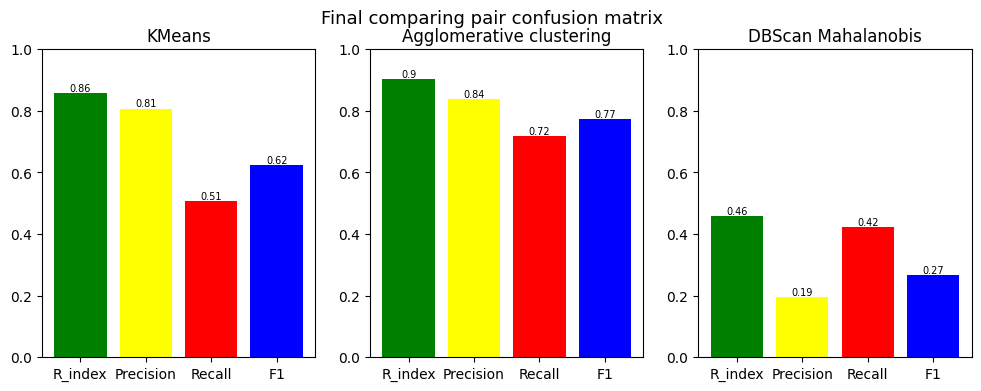

In [94]:
#Plot bar charts
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ut.values_pair_conf_matrix(rand_index, precision, recall, f1, 'KMeans', ax=ax1)
ut.values_pair_conf_matrix(rand_index_c, precision_c, recall_c, f1_c, 'Agglomerative clustering',ax=ax2)
ut.values_pair_conf_matrix(rand_index_m, precision_m, recall_m, f1_m, 'DBScan Mahalanobis',ax=ax3)
fig.suptitle("Final comparing pair confusion matrix", fontsize=13)
plt.savefig('3.Graphics/Comparazione pair confusion matrix finale_NoTrans.png')
plt.show()

#### Osservazioni:
Dei tre algoritrmi l'Agglomerative clustering si dimostra essere quello con le prestazioni migliori.

#### Osservazioni:
Dei tre algoritrmi DBScan è quello che più si discosta dall'obbiettivo del progetto dal momento che non riesce a creare raggruppamenti.

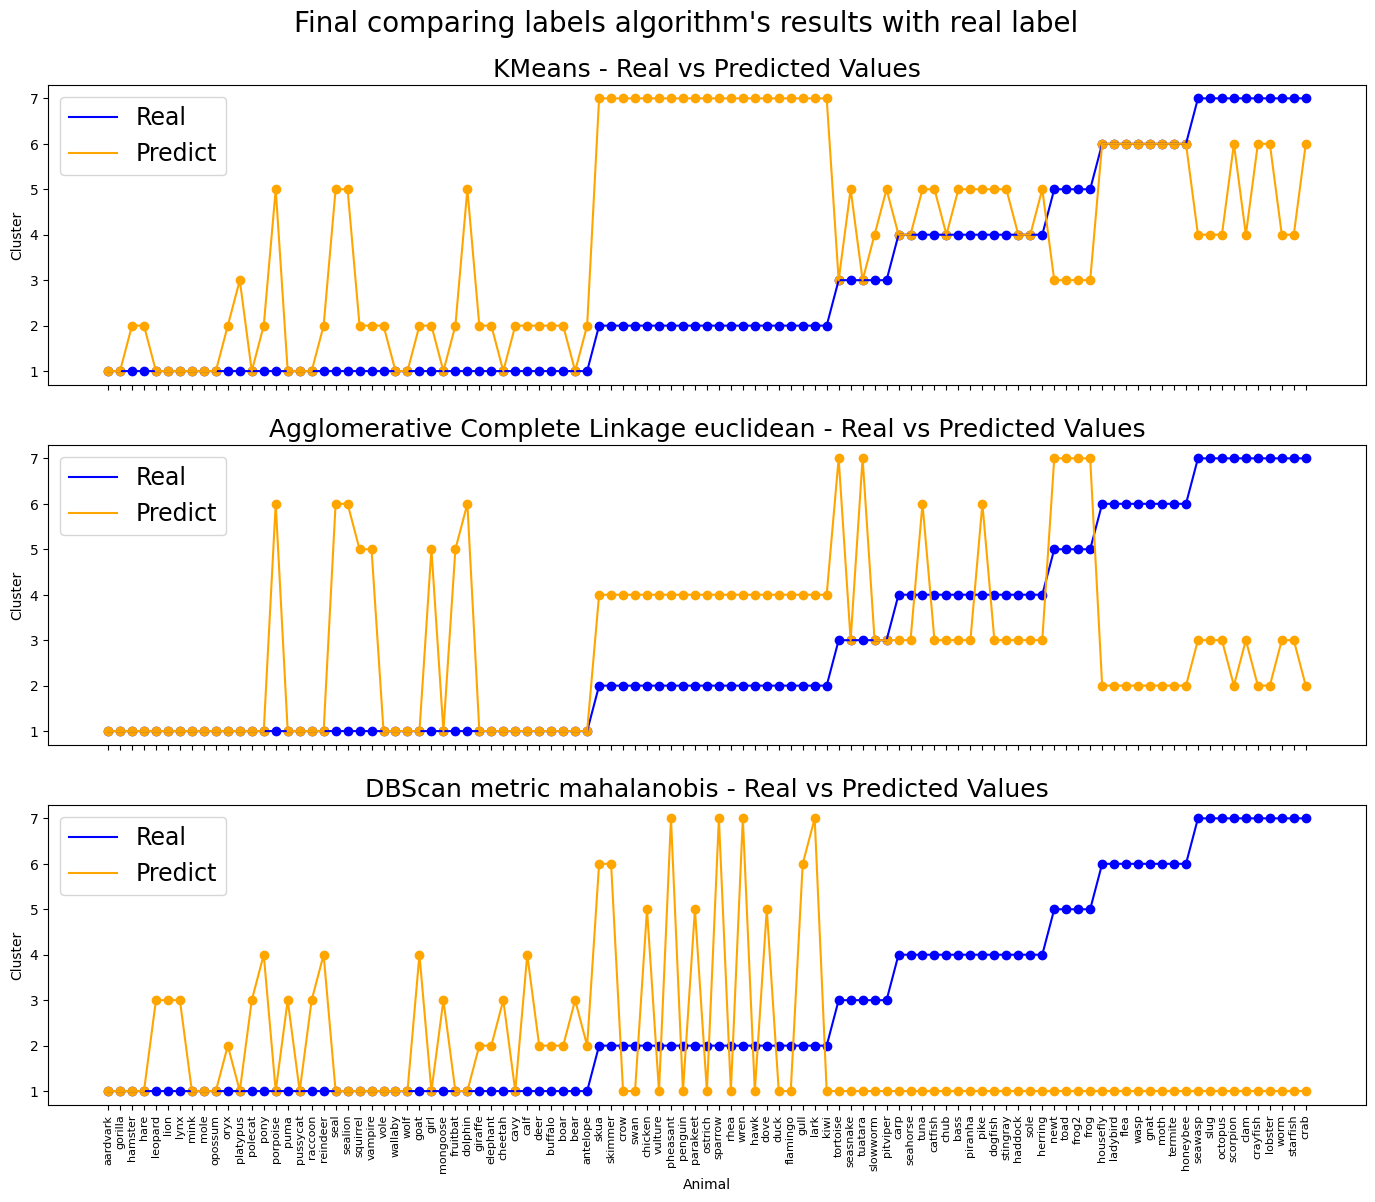

In [95]:
#Comparing different results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(17, 15))
ut.plot_res_ord(merged_df_km, 'KMeans - Real vs Predicted Values', ax=ax1)
ax1.set_xticklabels([]) #animal's name
ax1.set_xlabel('') #Animals
ut.plot_res_ord(merged_df_ag_com_lkeu, 'Agglomerative Complete Linkage euclidean - Real vs Predicted Values', ax=ax2)
ax2.set_xticklabels([])
ax2.set_xlabel('')
ut.plot_res_ord(merged_df_DBs_mah, 'DBScan metric mahalanobis - Real vs Predicted Values', ax=ax3)
fig.suptitle("Final comparing labels algorithm's results with real label", fontsize=20, y=0.93)
#fig.subplots_adjust(hspace=0.13)
fig.subplots_adjust(bottom=0.2)
plt.savefig('3.Graphics/Etichette reali e predette confronto finale_NoTrans.png')
plt.show()